In [1]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
from IPython.display import Image
from scipy import stats

In [3]:
df = (
    pd.read_csv("../data/2845651.csv")[["DATE", "TMAX"]].astype({"DATE": 'datetime64[ns]'})
    .set_index("DATE").query("DATE >= '1940-01-01'")
)
df.head()

,TMAX
DATE,
1940-01-01,24.0
1940-01-02,29.0
1940-01-03,32.0
1940-01-04,32.0
1940-01-05,29.0


In [5]:
# get rid of the occasional nan values
w_df = df[np.isnan(df['TMAX']) == False].assign(year=lambda df: df.index.year)
X_df = pd.DataFrame(w_df['year'] - np.min(w_df['year']))
X_df['const'] = 1.0
y = w_df['TMAX']


X_df

,year,const
DATE,,
1940-01-01,0,1.0
1940-01-02,0,1.0
1940-01-03,0,1.0
1940-01-04,0,1.0
1940-01-05,0,1.0
...,...,...
2022-01-10,82,1.0
2022-01-11,82,1.0
2022-01-12,82,1.0


In [7]:
X_df.year

DATE
1940-01-01     0
1940-01-02     0
1940-01-03     0
1940-01-04     0
1940-01-05     0
              ..
2022-01-10    82
2022-01-11    82
2022-01-12    82
2022-01-13    82
2022-01-14    82
Name: year, Length: 29964, dtype: int64

In [8]:
y

DATE
1940-01-01    24.0
1940-01-02    29.0
1940-01-03    32.0
1940-01-04    32.0
1940-01-05    29.0
              ... 
2022-01-10    38.0
2022-01-11    23.0
2022-01-12    40.0
2022-01-13    47.0
2022-01-14    44.0
Name: TMAX, Length: 29964, dtype: float64

In [9]:
xr = X_df.year.values
yr = y.values

In [19]:
with pm.Model() as model:
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    intercept = pm.Normal("Intercept", 1.0, sigma=20)
    x_coeff = pm.Normal("x", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * X_df.year.values, sigma=sigma, observed=yr)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, Intercept, x]


KeyboardInterrupt: 

In [16]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,18.891,0.076,18.748,19.031,0.002,0.002,1189.668,1094.592,1.000
Intercept,61.995,0.223,61.583,62.409,0.008,0.006,712.233,721.179,1.000
x,0.033,0.005,0.025,0.042,0.000,0.000,688.719,673.355,1.002


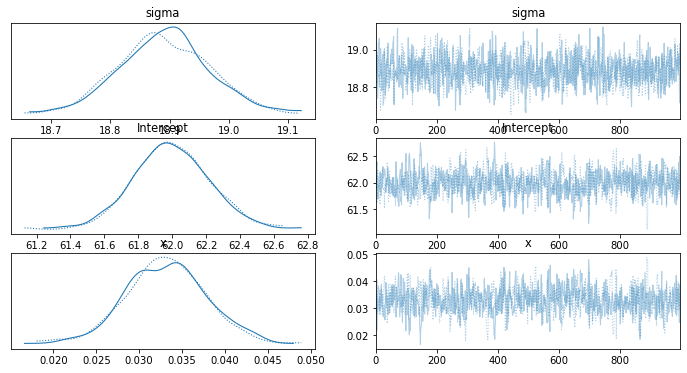

In [15]:
az.plot_trace(idata);

In [60]:
X_df = pd.get_dummies(w_df.index.month, prefix="month")
month_vars = list(X_df.columns)
X_df['year'] = w_df.reset_index()['year'] - np.min(w_df['year'])
X_df = X_df.set_index(w_df.index)
X_df

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year
DATE,,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-11,1,0,0,0,0,0,0,0,0,0,0,0,82
2022-01-12,1,0,0,0,0,0,0,0,0,0,0,0,82


In [61]:
xr = X_df[month_vars+['year']].values
yr = y.values

In [62]:
X_df[month_vars]

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-11,1,0,0,0,0,0,0,0,0,0,0,0
2022-01-12,1,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X_df[month_vars].values.shape

(29964, 12)

In [49]:
with pm.Model() as model:
    # sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    sigma = pm.Exponential('sigma', lam=0.01)
    year_coeff = pm.Normal("year", 0.0, sigma=20)
    month_coeff = pm.Normal("month", 0.0, sigma=20, shape=len(month_vars))

    mu = year_coeff * X_df.year.values + pm.math.dot(X_df[month_vars].values, month_coeff)

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=yr)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, year, month]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 61 seconds.


In [50]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,9.074,0.037,9.005,9.145,0.001,0.000,3145.968,1171.342,1.001
year,0.034,0.002,0.030,0.039,0.000,0.000,974.342,1099.796,1.001
month[0],37.587,0.206,37.163,37.944,0.005,0.003,2039.615,1336.391,1.000
month[1],40.177,0.214,39.785,40.576,0.004,0.003,2467.757,1631.667,1.001
month[2],48.902,0.204,48.510,49.276,0.005,0.003,2032.619,1184.528,1.000
month[3],60.520,0.204,60.104,60.872,0.004,0.003,2335.958,1803.403,1.003
month[4],70.874,0.201,70.502,71.253,0.004,0.003,2037.792,1328.647,1.000
month[5],80.061,0.209,79.682,80.454,0.004,0.003,2397.306,1726.455,1.000
month[6],84.958,0.204,84.595,85.333,0.004,0.003,2166.029,1475.048,1.000
month[7],82.949,0.203,82.591,83.346,0.005,0.003,1922.452,1341.344,1.000


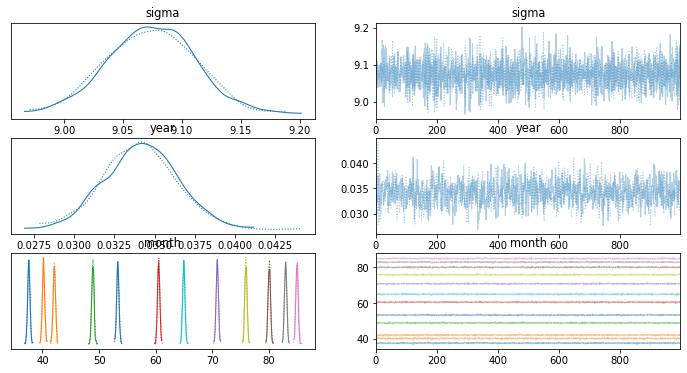

In [51]:
az.plot_trace(idata);

In [73]:
X_df_m = X_df.assign(month=lambda df: df.index.month-1)
X_df_m

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year,month
DATE,,,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,0,0,82,0
2022-01-11,1,0,0,0,0,0,0,0,0,0,0,0,82,0
2022-01-12,1,0,0,0,0,0,0,0,0,0,0,0,82,0


In [74]:
with pm.Model() as model:
    # sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    sigma = pm.Exponential('sigma', lam=0.01)
    year_coeff = pm.Normal("year", 0.0, sigma=20)
    month_coeff = pm.Normal("month", 0.0, sigma=20, shape=len(month_vars))

    mu = year_coeff * X_df.year.values + month_coeff[X_df_m['month'].values]

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=yr)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, year, month]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 32 seconds.


In [76]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,9.073,0.036,9.004,9.140,0.001,0.000,3646.557,1113.676,1.001
year,0.034,0.002,0.030,0.038,0.000,0.000,1005.320,1502.993,1.003
month[0],37.589,0.205,37.186,37.948,0.005,0.003,2074.593,1564.412,1.000
month[1],40.170,0.205,39.809,40.564,0.005,0.003,1994.075,1528.885,1.002
month[2],48.904,0.207,48.520,49.276,0.004,0.003,2110.114,1530.278,1.002
month[3],60.519,0.203,60.156,60.924,0.004,0.003,2112.626,1668.535,1.000
month[4],70.866,0.205,70.493,71.225,0.005,0.003,1837.641,1517.635,1.002
month[5],80.059,0.208,79.685,80.446,0.005,0.003,2015.183,1492.747,1.000
month[6],84.959,0.199,84.581,85.322,0.005,0.003,1909.601,1712.459,1.002
month[7],82.946,0.204,82.571,83.320,0.004,0.003,2111.293,1331.871,1.000


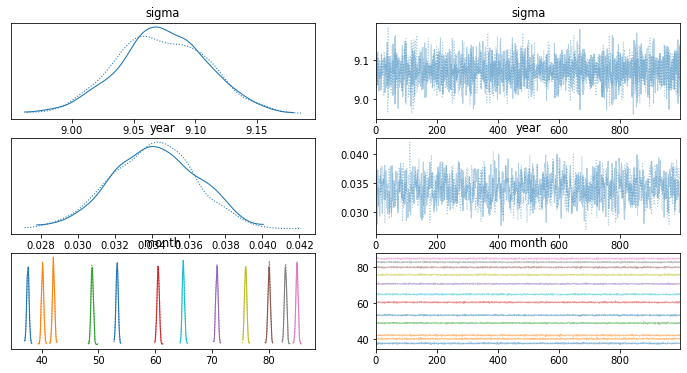

In [75]:
az.plot_trace(idata);

In [63]:
np.random.seed(2025)
beta1 = np.random.normal(loc=0, scale=2, size=5)
beta2 = np.random.normal(loc=1, scale=1, size=4)

x1 = np.random.choice(5,size=100)
x2 = np.random.choice(4,p=[0.1,0.2,0.3,0.4],size=100)
y1 = beta1[x1] + beta2[x2] + np.random.normal(loc=0, scale=0.1, size=100)
data = pd.DataFrame({'x1': x1,'x2': x2,'y1': y1})

In [65]:
with pm.Model() as categorical_model:
    x1 = data['x1'].values # theano.shared(data['x1'].values)
    x2 = data['x2'].values #theano.shared(data['x2'].values)
    y1 = pm.Data('y1',data['y1'].values)

    cat_x1 = pm.Normal('cat_x1',0,1,shape=len(data['x1'].unique()))
    cat_x2 = pm.Normal('cat_x2',0,1,shape=len(data['x2'].unique()))
    sigma = pm.Exponential('error',lam=1)

    mu = cat_x1[x1] + cat_x2[x2] #+ alpha
    y_hat = pm.Normal('y_hat',mu,sigma,observed=y1)
    trace_categorical = pm.sample(500,tune=1500,chains=2, cores=2, target_accept=0.95)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [cat_x1, cat_x2, error]


Sampling 2 chains for 1_500 tune and 500 draw iterations (3_000 + 1_000 draws total) took 34 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


In [69]:
x1

array([1, 3, 3, 2, 1, 2, 4, 4, 2, 2, 2, 4, 4, 1, 4, 4, 1, 4, 0, 0, 0, 2,
       0, 1, 2, 1, 0, 2, 4, 0, 3, 2, 0, 1, 4, 4, 4, 3, 3, 3, 3, 4, 3, 0,
       4, 4, 1, 4, 1, 2, 0, 0, 1, 1, 4, 2, 4, 4, 3, 2, 0, 3, 0, 3, 3, 0,
       0, 3, 0, 0, 0, 3, 1, 3, 3, 4, 1, 2, 3, 1, 1, 3, 3, 4, 0, 3, 0, 2,
       3, 3, 2, 3, 1, 4, 0, 3, 4, 0, 2, 1])

In [66]:
az.summary(trace_categorical, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
cat_x1[0],1.075,0.379,0.437,1.870,0.048,0.034,62.981,87.609,1.046
cat_x1[1],2.711,0.380,2.076,3.517,0.048,0.034,63.155,81.589,1.046
cat_x1[2],-1.614,0.380,-2.265,-0.832,0.048,0.034,62.947,77.658,1.046
cat_x1[3],-0.113,0.379,-0.756,0.675,0.048,0.034,63.382,88.992,1.045
cat_x1[4],1.088,0.379,0.436,1.875,0.048,0.034,63.019,81.348,1.045
cat_x2[0],1.943,0.378,1.148,2.578,0.048,0.034,63.122,66.547,1.046
cat_x2[1],1.147,0.381,0.336,1.778,0.048,0.034,62.605,84.981,1.047
cat_x2[2],-0.481,0.379,-1.268,0.161,0.048,0.034,63.034,88.135,1.045
cat_x2[3],0.502,0.379,-0.279,1.152,0.048,0.034,63.050,82.636,1.046
error,0.089,0.006,0.077,0.100,0.000,0.000,226.158,208.433,1.007


## Interaction

In [52]:
X_df = pd.get_dummies(w_df.index.month, prefix="month")
month_vars = list(X_df.columns)

X_df['year'] = w_df.reset_index()['year'] - np.min(w_df['year'])
X_df = X_df.set_index(w_df.index)

interaction_vars = []
for c in month_vars:
    v = f"{c}_i"
    X_df[v] = X_df[c] * X_df['year']
    
    interaction_vars += [v]
    
X_df

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,month_3_i,month_4_i,month_5_i,month_6_i,month_7_i,month_8_i,month_9_i,month_10_i,month_11_i,month_12_i
DATE,,,,,,,,,,,,,,,,,,,,,
1940-01-01,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940-01-03,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940-01-04,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1940-01-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_df[interaction_vars].tail(100)

,month_1_i,month_2_i,month_3_i,month_4_i,month_5_i,month_6_i,month_7_i,month_8_i,month_9_i,month_10_i,month_11_i,month_12_i
DATE,,,,,,,,,,,,
2021-10-06,0,0,0,0,0,0,0,0,0,81,0,0
2021-10-07,0,0,0,0,0,0,0,0,0,81,0,0
2021-10-08,0,0,0,0,0,0,0,0,0,81,0,0
2021-10-09,0,0,0,0,0,0,0,0,0,81,0,0
2021-10-10,0,0,0,0,0,0,0,0,0,81,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,82,0,0,0,0,0,0,0,0,0,0,0
2022-01-11,82,0,0,0,0,0,0,0,0,0,0,0
2022-01-12,82,0,0,0,0,0,0,0,0,0,0,0


In [59]:
X_cut_df = X_df.query("month_12_i == 1")
X_cut_df.shape

(31, 25)

In [ ]:
month_12_i

In [38]:
with pm.Model() as model:
    # sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    sigma = pm.Exponential('sigma', lam=0.01)
    year_coeff = pm.Normal("year", 1.0, sigma=20)
    month_coeff = pm.Normal("month", 1.0, sigma=20, shape=len(month_vars))
    month_i_coeff = pm.Normal("month_i", 1.0, sigma=20, shape=len(interaction_vars))

    mu = (
        year_coeff * X_df.year.values + pm.math.dot(X_df[month_vars].values, month_coeff)
        + pm.math.dot(X_df[interaction_vars].values, month_i_coeff)
    )

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=yr)

    # 
    idata = pm.sample(tune=1000)  # , nuts={'target_accept':0.95}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, year, month, month_i]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3958 seconds.
The acceptance probability does not match the target. It is 0.9149, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 789 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3427, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
"""
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 804 seconds.
There were 762 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4953, but should be close to 0.8. Try to increase the number of tuning steps.
There were 871 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.06439, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
"""

In [32]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,9.085,0.014,9.069,9.102,0.010,0.008,2.273,7.894,3.023
year,-2.819,1.410,-4.236,-1.399,0.993,0.840,2.516,29.603,2.322
month[0],37.834,0.329,37.499,38.176,0.232,0.196,2.400,7.615,2.589
month[1],39.375,0.015,39.348,39.393,0.008,0.006,3.336,23.178,1.681
month[2],48.067,0.080,47.982,48.159,0.056,0.047,2.644,16.642,2.256
month[3],60.561,0.211,60.347,60.796,0.149,0.126,2.531,14.526,2.276
month[4],71.312,0.075,71.234,71.407,0.052,0.044,2.732,12.510,2.067
month[5],80.057,0.358,79.687,80.418,0.252,0.213,2.704,96.297,2.062
month[6],84.925,0.229,84.689,85.181,0.161,0.136,2.507,11.112,2.312
month[7],83.385,0.224,83.133,83.618,0.157,0.133,2.554,10.967,2.228


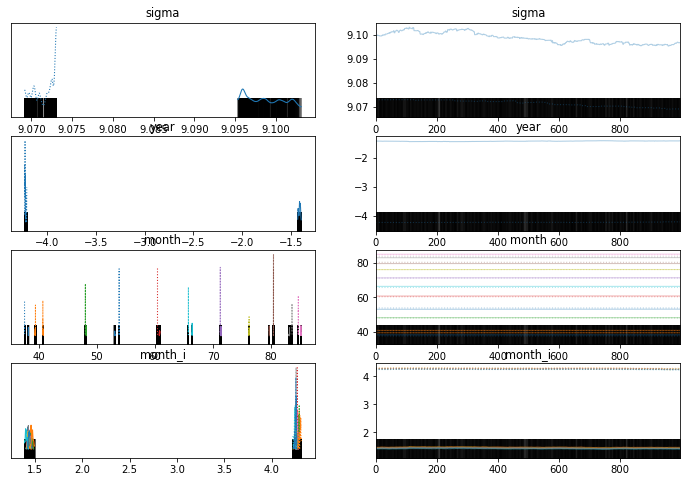

In [33]:
az.plot_trace(idata);

# Interaction v2

In [82]:
X_df = w_df.assign(month=lambda df: df.index.month-1).copy().reset_index()
X_df['year'] = w_df.reset_index()['year'] - np.min(w_df['year'])
X_df = X_df.set_index(w_df.index)
X_df

,DATE,TMAX,year,month
DATE,,,,
1940-01-01,1940-01-01,24.0,0,0
1940-01-02,1940-01-02,29.0,0,0
1940-01-03,1940-01-03,32.0,0,0
1940-01-04,1940-01-04,32.0,0,0
1940-01-05,1940-01-05,29.0,0,0
...,...,...,...,...
2022-01-10,2022-01-10,38.0,82,0
2022-01-11,2022-01-11,23.0,82,0
2022-01-12,2022-01-12,40.0,82,0


In [84]:
with pm.Model() as model:
    # sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    sigma = pm.Exponential('sigma', lam=0.01)
    year_coeff = pm.Normal("year", 1.0, sigma=20)
    month_coeff = pm.Normal("month", 1.0, sigma=20, shape=len(month_vars))
    month_i_coeff = pm.Normal("month_i", 1.0, sigma=20, shape=len(interaction_vars))

    # mu = (
    #     year_coeff * X_df.year.values + pm.math.dot(X_df[month_vars].values, month_coeff)
    #     + pm.math.dot(X_df[interaction_vars].values, month_i_coeff)
    # )
    mu = (
        year_coeff * X_df.year.values + month_coeff[X_df_m['month'].values] + 
        X_df_m['year'].values * month_i_coeff[X_df_m['month'].values]
    )

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=yr)

    # 
    idata = pm.sample(tune=1000)  # , nuts={'target_accept':0.95}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, year, month, month_i]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1013 seconds.
There were 783 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2772, but should be close to 0.8. Try to increase the number of tuning steps.
There were 758 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.306, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [85]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,9.041,0.064,8.976,9.106,0.045,0.038,2.887,12.764,1.851
year,8.234,2.796,5.421,11.041,1.969,1.666,2.547,10.670,2.228
month[0],37.846,0.076,37.764,37.927,0.053,0.045,2.647,11.623,2.136
month[1],39.541,0.065,39.465,39.614,0.046,0.039,2.281,10.969,2.972
month[2],48.334,0.529,47.790,48.868,0.373,0.315,2.613,10.899,2.134
month[3],60.634,0.165,60.445,60.803,0.116,0.098,2.489,12.238,2.356
month[4],71.332,0.273,71.048,71.611,0.193,0.163,2.808,10.979,1.941
month[5],80.672,0.126,80.535,80.801,0.089,0.075,2.589,10.600,2.169
month[6],85.100,0.274,84.815,85.383,0.193,0.163,2.280,11.429,3.047
month[7],83.284,0.095,83.182,83.383,0.067,0.057,2.568,11.839,2.220


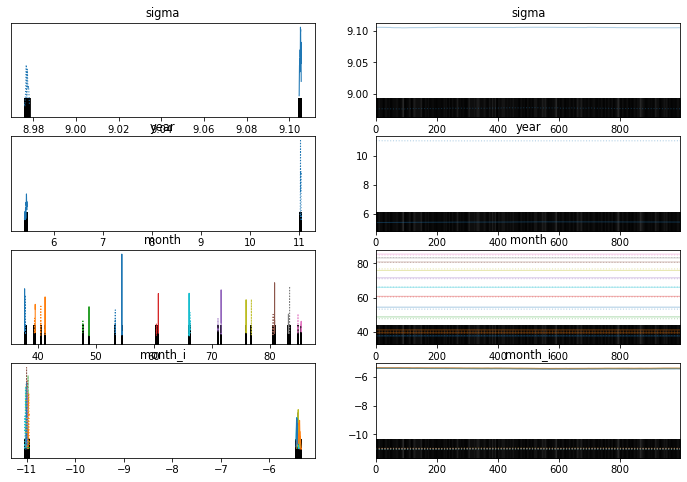

In [86]:
az.plot_trace(idata);

# Pooled year

With inspiration from here https://vincentk1991.github.io/Bayesian-regression-tutorial/#regression-with-confounds

In [87]:
with pm.Model() as model:
    # sigma = pm.HalfCauchy("sigma", beta=10, initval=1.0)
    sigma = pm.Exponential('sigma', lam=0.01)
    # year_coeff = pm.Normal("year", 1.0, sigma=20)
    month_coeff = pm.Normal("month", 1.0, sigma=20, shape=len(month_vars))

    # mu = (
    #     year_coeff * X_df.year.values + pm.math.dot(X_df[month_vars].values, month_coeff)
    #     + pm.math.dot(X_df[interaction_vars].values, month_i_coeff)
    # )
    
    pooled_year_mu = pm.Normal('pooled_year_mu',1.0, sigma=20)
    pooled_year_sigma = pm.Exponential('pooled_year_sigma',lam=0.01)

    month_i_coeff = pm.Normal("month_i", 
                              pooled_year_mu, 
                              sigma=pooled_year_sigma, 
                              shape=len(interaction_vars))

    # year_coeff * X_df.year.values +
    mu = (
        month_coeff[X_df_m['month'].values] + 
        X_df_m['year'].values * month_i_coeff[X_df_m['month'].values]
    )

    likelihood = pm.Normal("y", mu=mu, sigma=sigma, observed=yr)

    # 
    idata = pm.sample(tune=1000)  # , nuts={'target_accept':0.95}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/vshulyak/opt/miniconda3/envs/intuitive_bayes/lib/python3.9/site-packages/pymc/model.py:984: FutureWarning: `Model.initial_point` has been deprecated. Use `Model.recompute_initial_point(seed=None)`.
  warnings.warn(
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, month, pooled_year_mu, pooled_year_sigma, month_i]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 88 seconds.


In [88]:
az.summary(idata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,9.069,0.036,9.002,9.136,0.001,0.000,3274.611,1397.293,1.003
month[0],37.518,0.326,36.935,38.172,0.005,0.004,3614.745,1486.377,1.000
month[1],39.622,0.354,38.990,40.283,0.006,0.004,3241.836,1604.970,1.000
month[2],48.428,0.348,47.787,49.059,0.006,0.004,3710.933,1445.961,1.000
month[3],60.464,0.334,59.843,61.090,0.006,0.004,3059.118,1727.258,1.000
month[4],71.077,0.322,70.489,71.674,0.005,0.004,3907.690,1696.792,1.000
month[5],80.307,0.328,79.723,80.937,0.006,0.004,3358.532,1384.257,1.001
month[6],85.072,0.331,84.463,85.700,0.005,0.004,3800.356,1596.396,1.001
month[7],82.950,0.340,82.319,83.592,0.005,0.004,4110.911,1256.789,1.002
month[8],76.164,0.340,75.505,76.761,0.005,0.004,4242.162,1653.704,1.001


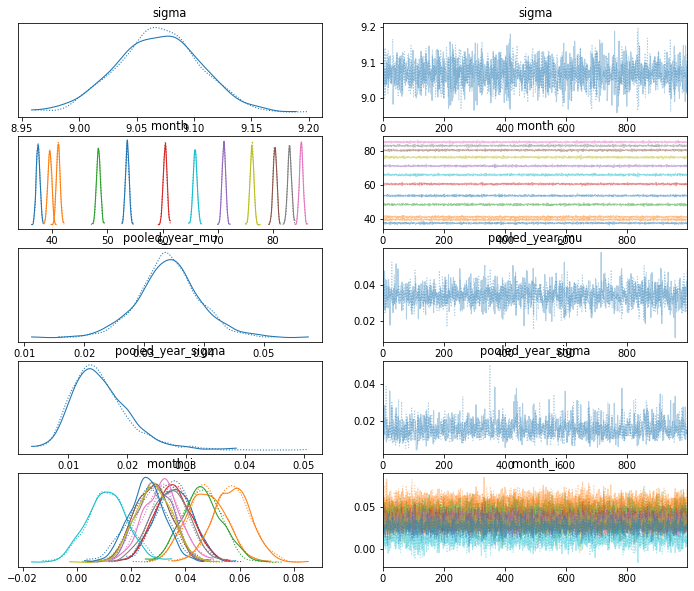

In [89]:
az.plot_trace(idata);